In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sezan/anaconda3/envs/tf1.14/lib/python3.6/s

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

In [6]:
import os
import cv2
import numpy as np

In [7]:
DATA_FOLDER = "../data/Simulator/"

In [8]:
normal = os.path.join(DATA_FOLDER,"CenterLaneDriving")
recovery = os.path.join(DATA_FOLDER,"RecoveryLap")
difficult = os.path.join(DATA_FOLDER,"Difficult")

In [9]:
names = ["Center Image","Left Image","Right Image","Steering", "Throttle", "Brake", "Speed"]

In [10]:
normal_driving_log = pd.read_csv(os.path.join(normal,"driving_log.csv"),names = names)

In [11]:
normal_driving_log.head()

,Center Image,Left Image,Right Image,Steering,Throttle,Brake,Speed
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.892318
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.811010
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.750371
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.670085
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.128493,0,9.627087


<AxesSubplot:>

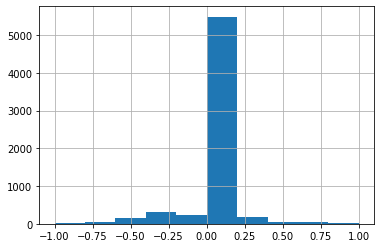

In [12]:
normal_driving_log["Steering"].hist(bins=10)

In [13]:

recovery_driving_log = pd.read_csv(os.path.join(recovery,"driving_log.csv"),names = names)

In [14]:
recovery_driving_log.head()

,Center Image,Left Image,Right Image,Steering,Throttle,Brake,Speed
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,3.034396
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,3.011356
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.988503
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.971483
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.948949


<AxesSubplot:>

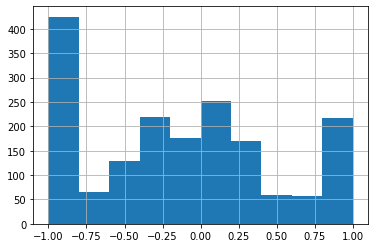

In [15]:
recovery_driving_log[recovery_driving_log["Steering"]!=0.0]["Steering"].hist()

In [16]:
full_driving_log = pd.concat([normal_driving_log,recovery_driving_log])

In [17]:
data = full_driving_log[["Center Image","Steering"]]

In [18]:
data.head()

,Center Image,Steering
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0


In [19]:
train,test =train_test_split(data)

<AxesSubplot:>

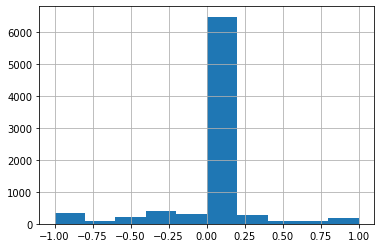

In [20]:
train["Steering"].hist()

<AxesSubplot:>

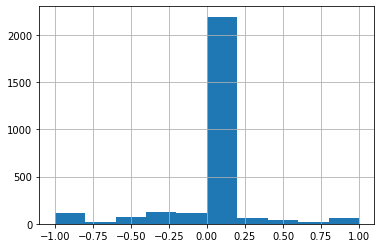

In [21]:
test["Steering"].hist()

In [49]:
def resize_image(images,new_size=(128,128)):
    new_image_shape = (images.shape[0],new_size[0],new_size[1],images.shape[3])
    resized_images = np.zeros(shape = new_image_shape)
    for i,image in enumerate(images):
        resized_images[i,:,:,:] = cv2.resize(image,new_size)
    return resized_images

In [50]:
def preprocess(images,new_size=(128,128)):
    images = images[:,60:140,:]
    images = images/255
    images = resize_image(images,new_size)
    return images

In [51]:
def read_images(batch):
    images = [None]*len(batch)
    for i,image_name in enumerate(batch):
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images[i] = image
    images = np.array(images)
    return preprocess(images)
    

In [81]:
def loader(data,batch_size):
    for i in range(0,data.shape[0],batch_size):
        batch = data.iloc[i:i+batch_size]
        batch_image_names = batch["Center Image"].values.tolist()
        batch_images = read_images(batch_image_names)
        steering = batch["Steering"].values.tolist()
        if i%batch_size==0:
            yield batch_images,steering
            

In [82]:
for images,steering in loader(train,32):
    print(images.shape)
    break

(32, 128, 128, 3)


In [83]:
image = images[10]

In [84]:
image.shape

(128, 128, 3)

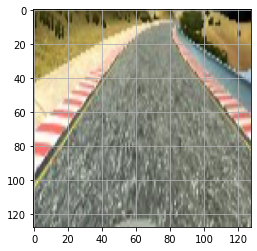

In [85]:
plt.imshow(image)
plt.grid()

In [86]:
from keras.models import Sequential

In [87]:
from keras import layers

In [88]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu', input_shape=(128,128, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(1))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [89]:
model.compile(optimizer = 'Adam',loss = 'mse')

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 63, 63, 32)        896       
_________________________________________________________________
flatten_4 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 127009    
Total params: 127,905
Trainable params: 127,905
Non-trainable params: 0
_________________________________________________________________


In [91]:
train_loader = loader(train,32)
test_loader = loader(test,32)

In [98]:
model.fit_generator(train_loader,steps_per_epoch=len(train)//32,validation_data=test_loader,validation_steps=87)

Epoch 1/1


StopIteration: 

In [96]:
len(test)//32

87